In [ ]:
# open test_predictions.tsv as pandas df

import pandas as pd

df = pd.read_csv('test_predictions.tsv', sep='\t')

df.head()

,session_id,participant_id,sex,education_level,age_bl,marital_status,ethnic_cat,adni_rid,site,original_study,...,apoe4,apoe_gen1,apoe_gen2,ravlt_immediate_bl,moca_bl,trabscor_bl,mpaccdigit_bl,mpacctrails_bl,true_label,predicted_label
0,ses-M000,sub-ADNI037S0327,M,16,70.0,Divorced,Not Hisp/Latino,327,37,ADNI1,...,0.0,3.0,4.0,44.0,NaN,74.0,-1.66717,-1.95901,CN,CN
1,ses-M006,sub-ADNI016S0702,M,16,85.0,Married,Not Hisp/Latino,702,16,ADNI1,...,1.0,3.0,3.0,19.0,NaN,78.0,-5.69643,-5.32863,LMCI,LMCI
2,ses-M006,sub-ADNI018S0155,M,16,81.1,Married,Not Hisp/Latino,155,18,ADNI1,...,1.0,3.0,3.0,26.0,NaN,53.0,-7.09983,-6.11398,LMCI,LMCI
3,ses-M006,sub-ADNI029S1073,F,18,65.7,Married,Not Hisp/Latino,1073,29,ADNI1,...,1.0,3.0,4.0,23.0,NaN,162.0,-9.84172,-9.24986,LMCI,LMCI
4,ses-M012,sub-ADNI023S0217,F,18,83.6,Married,Not Hisp/Latino,217,23,ADNI1,...,0.0,4.0,4.0,30.0,NaN,76.0,-8.93327,-8.99413,LMCI,LMCI


In [ ]:

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)

import pandas as pd
import numpy as np

# Assuming df is already loaded
y_true = df['true_label']
y_pred = df['predicted_label']
labels = np.unique(y_true)

# Micro and macro accuracy
micro_acc = accuracy_score(y_true, y_pred)
macro_acc = np.mean([
    (y_true[y_true == l] == y_pred[y_true == l]).mean()
    for l in labels
])

# Precision, Recall, F1 (macro average)
precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)


# AUC
y_true_bin = pd.get_dummies(y_true)
y_pred_bin = pd.get_dummies(y_pred).reindex(columns=y_true_bin.columns, fill_value=0)
auc_roc = roc_auc_score(y_true_bin, y_pred_bin, average='macro', multi_class='ovr')

# Display
print(f"Micro Accuracy: {micro_acc:.4f}")
print(f"Macro Accuracy: {macro_acc:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1 Score (macro): {f1:.4f}")
print(f"Underestimated AUC-ROC (macro): {auc_roc:.4f}")

Micro Accuracy: 0.7939
Macro Accuracy: 0.7929
Precision (macro): 0.7824
Recall (macro): 0.7929
F1 Score (macro): 0.7797
Underestimated AUC-ROC (macro): 0.8421


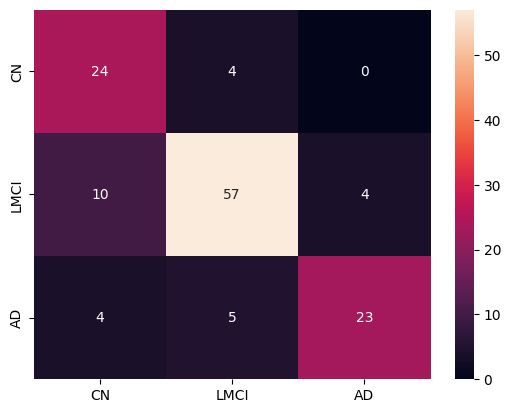

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



sns.heatmap(confusion_matrix(df['true_label'], df['predicted_label'], labels=['CN', 'LMCI', 'AD']), annot=True, fmt='d', xticklabels=['CN', 'LMCI', 'AD'], yticklabels=['CN', 'LMCI', 'AD'])
plt.show()

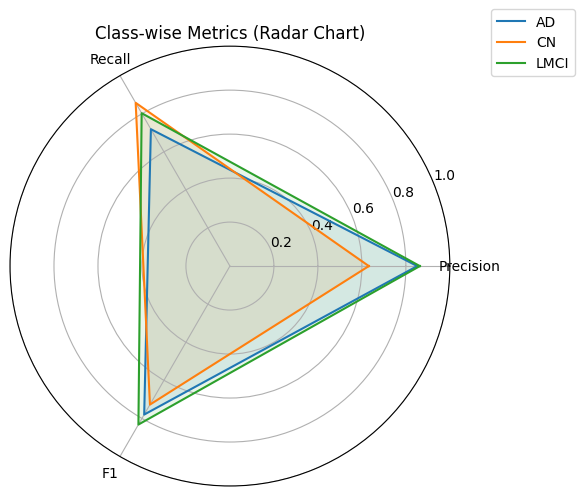

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Get labels
labels = sorted(df['true_label'].unique())
y_true = df['true_label']
y_pred = df['predicted_label']

# Metrics per class
precision = precision_score(y_true, y_pred, average=None, labels=labels, zero_division=0)
recall = recall_score(y_true, y_pred, average=None, labels=labels, zero_division=0)
f1 = f1_score(y_true, y_pred, average=None, labels=labels, zero_division=0)

# Prepare radar chart data
metrics = ['Precision', 'Recall', 'F1']
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]

# Plot for each class
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for i, label in enumerate(labels):
    values = [precision[i], recall[i], f1[i]]
    values += values[:1]
    ax.plot(angles, values, label=label)
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.set_title("Class-wise Metrics (Radar Chart)")
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

Mounted at /content/drive


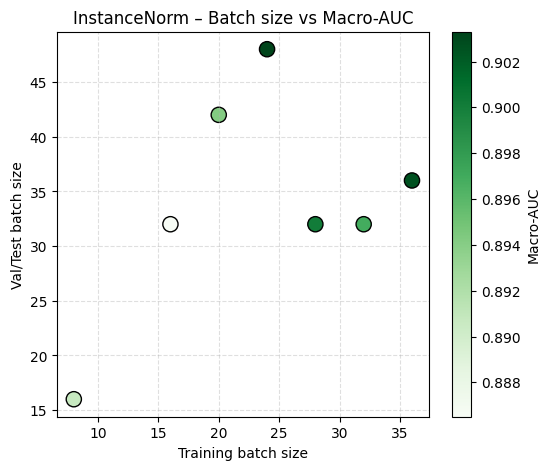

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 1. Uploading Data
df = pd.read_csv("instance_auc_sp.csv")

# 2. Instance Normalization: Scatterplot of Batch Size vs Macro-AUC
plt.figure(figsize=(6,5))
sc = plt.scatter(df['train_bs'],
                 df['val_bs'],
                 c=df['macro_auc'],
                 cmap='Greens',
                 vmin=df['macro_auc'].min(),
                 vmax=df['macro_auc'].max(),
                 s=120, edgecolor='k')

plt.colorbar(sc, label='Macro-AUC')
plt.xlabel('Training batch size')
plt.ylabel('Val/Test batch size')
plt.title('InstanceNorm – Batch size vs Macro-AUC')
plt.grid(True, ls='--', alpha=.4)
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


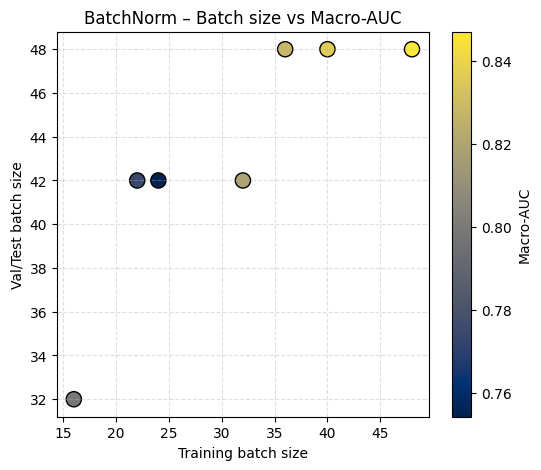

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 1. Uploading Data
df = pd.read_csv("batch_auc_sp.csv")

# 2. Batch Normalization: Scatterplot of Batch Size vs Macro-AUC
plt.figure(figsize=(6,5))
sc = plt.scatter(df['Train_batch_size'],
                 df['Val_Test_batch_size'],
                 c=df['Macro_AUC'],
                 cmap='cividis',  # Colormap meno "positiva" del verde
                 vmin=df['Macro_AUC'].min(),
                 vmax=df['Macro_AUC'].max(),
                 s=120, edgecolor='k')

plt.colorbar(sc, label='Macro-AUC')
plt.xlabel('Training batch size')
plt.ylabel('Val/Test batch size')
plt.title('BatchNorm – Batch size vs Macro-AUC')
plt.grid(True, ls='--', alpha=.4)
plt.show()